In [5]:
import pandas as pd
import os

In [7]:
os.path.join(os.getcwd(), 'checkpoints')
os.path.dirname('./checkpoints/{epoch:02d}-{loss:.2f}.hdf5')

'./checkpoints'

In [2]:
data_path = './Data/Experiment/Tapping/try10_32758.9_5.4_24.7_60/191108Approach 02.txt'

In [3]:
def _GetHeader(header_line):
    index = []
    header = []
    
    for i, word in enumerate(header_line.split('\t')):
        if not word.isspace():
            index.append(i)
            header.append(word.strip())
    return index, header

In [4]:
with open(data_path, 'r') as file:
    index, header = _GetHeader(file.readline())
    
    d = []
    amp = []
    phas = []
    z_in = []
    z_out = []
    
    for line in file:
        str_list = line.split('\t')
        print(str_list[-1])

In [5]:
print(index)
print(header)

[0, 1, 2, 3, 10003]
['Distance (Bits)', 'Amplitude(V)', 'Phase(V)', 'Driving(V)', 'Response(V)']


## Check whether FHO model with nonlinear tip-sample force results in higher harmonics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cp_detection.ForceSimulation import ForcedHarmonicOscillator, DMT_Maugis, Null, SimulateGeneralMode

In [2]:
DMT = DMT_Maugis(0.2, 100, 2, 130, 1, 0.3, 0.3)
Free = Null()
ode_params = {'Q':600, 'A0':0.1, 'Om':1.0, 'k':40}
FHO = ForcedHarmonicOscillator(**ode_params, force_model = DMT)

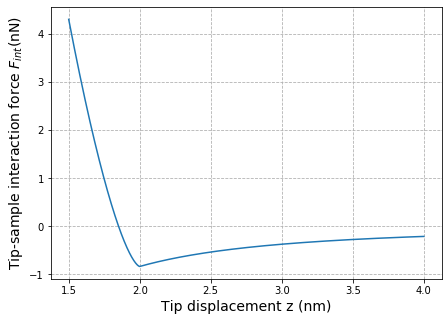

In [3]:
fig, ax = DMT.PlotForce((1.5, 4.0), (0, 0))

In [4]:
d_array = np.array([2.01])
t, z_array = SimulateGeneralMode(FHO, d_array, 0.1, 1000000, relaxation = 5, rtol = 1e-7)
z_array.shape

Data generation started
1/1 generated

(1, 1000000)

In [5]:
z_fft = np.fft.rfft(z_array-np.expand_dims(d_array, axis = -1))
f = np.linspace(0, 1, z_fft.shape[-1])*5 # time increment = 0.1 -> fs = 10, Nyquist = 5 (normalized)

(0.158, 0.162)

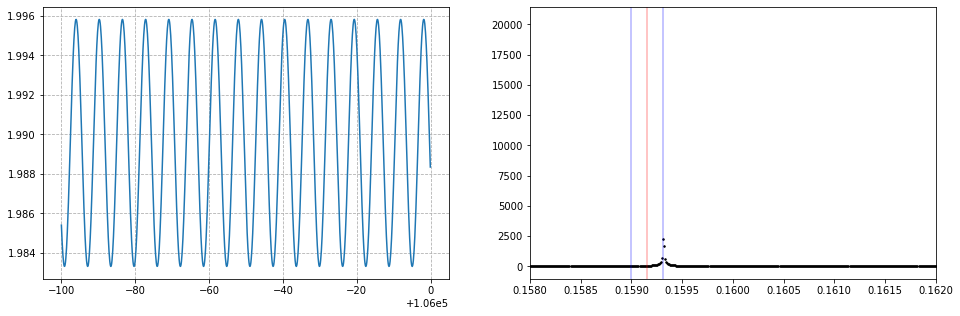

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
ax[0].plot(t[-1000:], z_array[0,-1000:])
ax[0].grid(ls = '--')

ind = 0
ax[1].plot(f[:z_fft.shape[-1]], np.abs(z_fft[ind, :]), '.k', markersize = 3)
ax[1].axvline(0.5/np.pi, color = 'r', alpha = 0.3)
ax[1].axvline(0.5/(np.pi*0.999), color = 'b', alpha = 0.3)
ax[1].axvline(0.5/(np.pi*1.001), color = 'b', alpha = 0.3)
ax[1].set_xlim((0.158, 0.162))

In [13]:
from cp_detection.FileParse import FileParser, Json2App
from cp_detection.ApproachCurve import ApproachCurve
from cp_detection.DataPreparation import AppCurveDataset

In [2]:
data_dir = './Data/Experiment/Tapping'
files = FileParser(data_dir, 'app', 'json')

34 files loaded


In [3]:
dataset = AppCurveDataset(files)

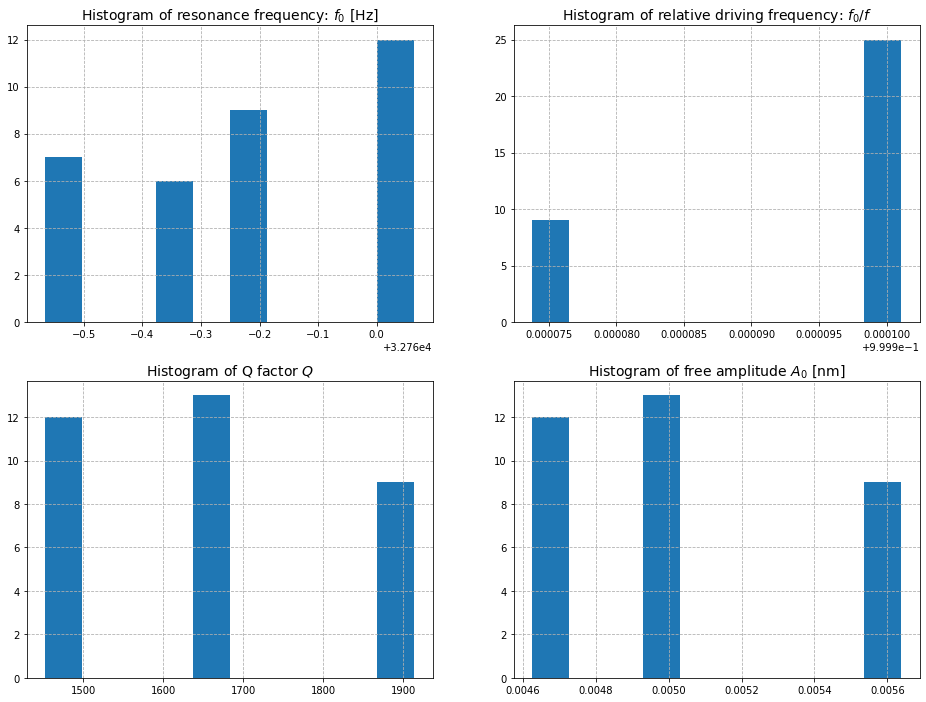

In [5]:
fig, axes = dataset.PlotParamDist()

In [3]:
converter = Json2App(files[1])
app_curve = converter()

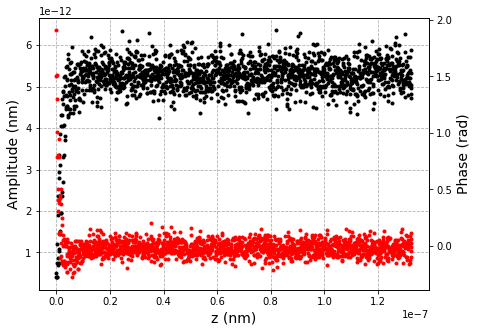

In [5]:
fig, ax = app_curve.PlotData()

In [14]:
import numpy as np
a = np.ravel([1,2,3,4,5])
b = np.flip(a)
a.flags['C_CONTIGUOUS']

True

In [5]:
import json
with open(files[0]) as json_file:
    json_data = json.load(json_file)
json_data.keys()

dict_keys(['type', 'w', 'Q', 'w0', 'C0_C', 'phas_offset', 'I0_r', 'sens', 'piezoCf', 'IVgain', 'z', 'amp_r', 'phas_r', 'k', 'gnd', 'amp_e', 'phas_e', 'amp', 'phas', 'k_int', 'b_int', 'Fk1', 'Fk2', 'Fb', 'Edis', 'A0', 'Omega'])

In [2]:
import numpy as np
from numba import float64, vectorize

In [11]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x.shape
ind = x[0,:]<3
~ind

array([False, False,  True])

In [28]:
a = (1, 1)
b = np.linspace(*a, 100)

In [31]:
np.vstack([b, b]).shape

(2, 100)